In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan  2 15:14:19 2019

@author: eiahb
"""
import gensim,os,sklearn,tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from datetime import datetime

from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim import models

%matplotlib inline


C:\Users\Evan\AppData\Local\conda\conda\envs\env_futures\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
START_DATE="2018-01-01"
ROOT_DIR_OF_PROJECT="C:\\Users\\Evan\\MyFile\\Fortune-street\\007 oil_price\\oilprice_news_analyze\\"
#ROOT="D:/work/fortune_street/002 news_analyze/002 data/002 corpus_data/"

root_dir=ROOT_DIR_OF_PROJECT+"002 data/002 corpus_data/"
list_of_source=os.listdir(root_dir+"raw_csv_data/")
list_of_source



['cnbc_news_data',
 'oil_price_news_data',
 'uk_reuters_news_data',
 'waiting_preprocess']

In [3]:
class Preprocessor:
    def __init__(self,stem=False):
        self.stem=stem
        
    def stem_and_other_stuff(self,each_news,do_tokenize=False):
        if do_tokenize:
            each_news=word_tokenize(each_news)
        ps=PorterStemmer()
        return([ps.stem(word.lower()) for word in each_news if word.isalpha()])
        
    def check_alpha_tolower(self,each_news,do_tokenize=False):
        if do_tokenize:
            each_news=word_tokenize(each_news)
        return([word.lower() for word in each_news if word.isalpha()])
    
    def my_word_tokenize(self,content):
        try:
            return(word_tokenize(content))
        except:
            print("tokenize fail")
            return([])
    def get_tokens(self,content):
        token_content=content.apply(self.my_word_tokenize)
        if self.stem:        
            tokens=token_content.apply(self.stem_and_other_stuff)
        else:
            tokens=token_content.apply(self.check_alpha_tolower)
        return(tokens)
        
    def get_counter(self,tokens):
        content_counter = Counter()
        for news in tokens:
            content_counter.update(news)
        return(content_counter)
preprocessor=Preprocessor(stem=True)

In [11]:
counter = Counter()
for aSource in list_of_source:
    list_of_filenames=os.listdir(root_dir+"raw_csv_data/"+aSource) 
    for aFile in list_of_filenames:
        filedir=root_dir+"raw_csv_data/"+aSource+"/"+aFile
        news_data_df=pd.read_csv(root_dir+"raw_csv_data/"+aSource+"/"+aFile)
        try:
            news_contents=news_data_df['content']
            news_titles=news_data_df['title']
            news_datetime=news_data_df['publish_datetime']
        except:
            continue
        news_tokens=preprocessor.get_tokens(news_contents)
        news_counter=preprocessor.get_counter(news_tokens)
        counter.update(news_counter)
        
        savedir=root_dir+"token_stemmed_txt_data/"+aSource+"/"+news_datetime[0]+"/"
        if not os.path.exists(savedir):
            os.makedirs(savedir)
        for a_news_id,a_news in enumerate(zip(news_titles,news_tokens)):
            a_title,a_tokens=a_news
            with open(savedir+"news_"+str(a_news_id)+".txt", "w",encoding="utf8") as text_file:
                text_file.writelines(a_title.lower()+"\n")
                for token in a_tokens:
                    text_file.write(token+"\n")
#         os.remove(filedir) 
        print(filedir,"preprocess done!")
                    
dictionary = counter
datetimestr=datetime.today().date().strftime("%Y_%m_%d")
# np.save('D:/work/fortune_street/002 news_analyze/002 data/003 outcome_data/word_counter_data/word_counter_'+datetimestr+'.npy', dictionary) 



C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/cnbc_news_data/cnbc_news_2018_12_04.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/cnbc_news_data/cnbc_news_2018_12_05.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/cnbc_news_data/cnbc_news_2018_12_06.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/cnbc_news_data/cnbc_news_2018_12_07.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/cnbc_news_data/cnbc_news_2018_12_08.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/cnbc_news_data/cnbc_news_2018_12_09.csv preprocess done

C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/cnbc_news_data/cnbc_news_2019_01_29.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/cnbc_news_data/cnbc_news_2019_01_30.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/cnbc_news_data/cnbc_news_2019_01_31.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/cnbc_news_data/cnbc_news_2019_02_01.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/cnbc_news_data/cnbc_news_2019_02_02.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/cnbc_news_data/cnbc_news_2019_02_03.csv preprocess done

C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_02_09.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_02_12.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_02_13.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_02_14.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_02_15.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_

C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_04_26.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_04_27.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_04_30.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_05_02.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_05_03.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_

C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_07_05.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_07_06.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_07_09.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_07_10.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_07_11.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_

C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_11_14.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_11_15.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_11_16.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_11_19.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2018_11_20.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_

C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2019_01_24.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2019_01_25.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2019_01_28.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2019_01_29.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_news_data/oilprice_news_2019_01_30.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/oil_price_

tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_03_13.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_03_14.csv preprocess done!
tokenize fail
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_03_15.csv preprocess done!
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_03_16.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_03_17.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price

tokenize fail
tokenize fail
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_04_26.csv preprocess done!
tokenize fail
tokenize fail
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_04_27.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_04_28.csv preprocess done!
tokenize fail
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_04_29.csv preprocess done!
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_04_30.

C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_06_08.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_06_09.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_06_10.csv preprocess done!
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_06_11.csv preprocess done!
tokenize fail
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_06_12.csv preprocess done!
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price

C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_07_22.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_07_23.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_07_24.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_07_25.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_07_26.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_

C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_09_05.csv preprocess done!
tokenize fail
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_09_06.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_09_07.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_09_08.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_09_09.csv preprocess done!
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news

tokenize fail
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_10_18.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_10_19.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_10_20.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_10_21.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_10_22.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 d

C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_12_02.csv preprocess done!
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_12_03.csv preprocess done!
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_12_04.csv preprocess done!
tokenize fail
tokenize fail
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_12_05.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2018_12_06.csv preprocess done!
tokenize fail
tokenize fail
C:\User

tokenize fail
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2019_01_16.csv preprocess done!
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2019_01_17.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2019_01_18.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2019_01_19.csv preprocess done!
tokenize fail
tokenize fail
C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data/002 corpus_data/raw_csv_data/uk_reuters_news_data/uk_reuters_news_2019_01_20.csv preprocess done!
C:\Users\Evan\MyFile\Fortune-street

OSError: Initializing from file failed

# try gensim

In [4]:
def read_news_txt_file(aFilepath):
    token_list=[]
    with open(aFilepath,"r",encoding='utf8') as f:
        news_title=f.readline()
        line = news_title
        while line :
            line = f.readline()
            token_list.append(line.strip())
    return(news_title,token_list)


In [5]:
counter_dir="C:/Users/Evan/MyFile/Fortune-street/007 oil_price/oilprice_news_analyze/002 data/003 outcome_data/word_counter_data/"
txt_dir="C:/Users/Evan/MyFile/Fortune-street/007 oil_price/oilprice_news_analyze/002 data/002 corpus_data/token_stemmed_txt_data/"
# C:\Users\Evan\MyFile\Fortune-street\007 oil_price\oilprice_news_analyze\002 data\002 corpus_data\token_txt_data

list_counter_filenames=list(os.walk(counter_dir))[0][2]
print(list_counter_filenames)
list_txt_source=list(os.walk(txt_dir))[0][1]
print(list_txt_source)

full_list=[]
for aSource in list_txt_source:
    for subpath , null , list_news_filenames in tqdm.tqdm(list(os.walk(txt_dir+aSource))[1:]):
        news_publish_date=subpath.split("\\")[1]
        source=subpath.split("\\")[0].split("/")[-1]
        for aFilename in list_news_filenames:
            aFilepath="/".join([subpath, aFilename])
            news_title,news_tokens_list=(read_news_txt_file(aFilepath))
            
            out_dict={'news_publish_date':news_publish_date,
                      'news_title':news_title,
                      'news_tokens_list':news_tokens_list,
                      'source':source}
            full_list.append(out_dict)

['word_counter.npy', 'word_counter_2019_02_08.npy', 'word_counter_2019_02_12.npy', 'word_counter_2019_02_26.npy']
['cnbc_news_data', 'oil_price_news_data', 'uk_reuters_news_data']


100%|██████████| 373/373 [02:06<00:00,  2.95it/s]


In [6]:
full_news_df=pd.DataFrame(full_list)
full_news_df.head(10)

,news_publish_date,news_title,news_tokens_list,source
0,2018-12-04,update 3-oil prices skid with global stock mar...,"[singapor, dec, reuter, oil, price, slump, by,...",cnbc_news_data
1,2018-12-04,u.s. oil prices slide with global markets on e...,"[singapor, dec, reuter, oil, price, slip, by, ...",cnbc_news_data
2,2018-12-04,heating oil futures turn negative in post-sett...,"[heat, oil, futur, turn, neg, in, trade, after...",cnbc_news_data
3,2018-12-04,oil futures fall in post-settlement trade afte...,"[oil, futur, fall, in, trade, after, api, data...",cnbc_news_data
4,2018-12-05,update 1-oil prices dip as stock markets slide...,"[opec, meet, singapor, dec, reuter, oil, price...",cnbc_news_data
5,2018-12-05,oil prices ease in cautious trading ahead of o...,"[singapor, dec, reuter, oil, price, dip, on, t...",cnbc_news_data
6,2018-12-05,"oil prices extend gains, brent crude up by mor...","[oil, price, extend, gain, brent, crude, up, b...",cnbc_news_data
7,2018-12-05,update 5-oil prices fall on global growth conc...,"[singapor, dec, reuter, oil, price, fell, on, ...",cnbc_news_data
8,2018-12-05,update 4-oil prices slip on global growth conc...,"[singapor, dec, reuter, oil, price, fell, on, ...",cnbc_news_data
9,2018-12-06,"oil firms on drop in us crude stocks, market a...","[decis, singapor, dec, reuter, oil, price, sta...",cnbc_news_data


In [7]:
def stop_words_filter(aListOfTokens,stopwords=None):
    new_l=[token for token in aListOfTokens if token not in stopwords]
    return(new_l)

In [8]:
corpus_for_vectorizer=full_news_df.news_tokens_list.apply(lambda x: " ".join(x))
vectorizer=TfidfVectorizer(max_df=0.7,min_df=15)
vectorizer.fit(corpus_for_vectorizer)
defined_stopwords=vectorizer.stop_words_

In [9]:
datetimestr=str(datetime.today().date())
np.save('C:\\Users\\Evan\\MyFile\\Fortune-street\\007 oil_price\\oilprice_news_analyze\\002 data\\003 outcome_data\\stop_words/stop_words_'+datetimestr+'.npy', defined_stopwords) 
full_news_df['news_tokens_list_stripped']=full_news_df.news_tokens_list.apply(stop_words_filter,stopwords=defined_stopwords)
full_news_df

,news_publish_date,news_title,news_tokens_list,source,news_tokens_list_stripped
0,2018-12-04,update 3-oil prices skid with global stock mar...,"[singapor, dec, reuter, oil, price, slump, by,...",cnbc_news_data,"[singapor, dec, oil, price, slump, around, per..."
1,2018-12-04,u.s. oil prices slide with global markets on e...,"[singapor, dec, reuter, oil, price, slip, by, ...",cnbc_news_data,"[singapor, dec, oil, price, slip, percent, ear..."
2,2018-12-04,heating oil futures turn negative in post-sett...,"[heat, oil, futur, turn, neg, in, trade, after...",cnbc_news_data,"[heat, oil, futur, turn, neg, trade, after, ap..."
3,2018-12-04,oil futures fall in post-settlement trade afte...,"[oil, futur, fall, in, trade, after, api, data...",cnbc_news_data,"[oil, futur, fall, trade, after, api, data, sh..."
4,2018-12-05,update 1-oil prices dip as stock markets slide...,"[opec, meet, singapor, dec, reuter, oil, price...",cnbc_news_data,"[opec, meet, singapor, dec, oil, price, fell, ..."
5,2018-12-05,oil prices ease in cautious trading ahead of o...,"[singapor, dec, reuter, oil, price, dip, on, t...",cnbc_news_data,"[singapor, dec, oil, price, dip, thursday, tep..."
6,2018-12-05,"oil prices extend gains, brent crude up by mor...","[oil, price, extend, gain, brent, crude, up, b...",cnbc_news_data,"[oil, price, extend, gain, brent, crude, up, m..."
7,2018-12-05,update 5-oil prices fall on global growth conc...,"[singapor, dec, reuter, oil, price, fell, on, ...",cnbc_news_data,"[singapor, dec, oil, price, fell, wednesday, p..."
8,2018-12-05,update 4-oil prices slip on global growth conc...,"[singapor, dec, reuter, oil, price, fell, on, ...",cnbc_news_data,"[singapor, dec, oil, price, fell, wednesday, p..."
9,2018-12-06,"oil firms on drop in us crude stocks, market a...","[decis, singapor, dec, reuter, oil, price, sta...",cnbc_news_data,"[decis, singapor, dec, oil, price, stabilis, f..."


In [11]:
# DICT_FOLDER = "D:/work/fortune_street/002 news_analyze/002 data/003 outcome_data/gemsim_outcome/dictionary/"
# CORPUS_FOLDER="D:/work/fortune_street/002 news_analyze/002 data/003 outcome_data/gemsim_outcome/corpus/"
# saving_date=datetime.today().date()
# print('Folder "{}" will be used to save dictionary and corpus for {}'.format(DICT_FOLDER,saving_date))
# if not os.path.exists(CORPUS_FOLDER):
#     os.makedirs(CORPUS_FOLDER)
# if not os.path.exists(DICT_FOLDER):
#     os.makedirs(DICT_FOLDER)

In [16]:
dictionary = corpora.Dictionary(full_news_df.news_tokens_list_stripped)
# dictionary.save(os.path.join(DICT_FOLDER, str(saving_date)+'.dict'))  # store the dictionary, for future reference
print(dictionary)
print(len(dictionary.token2id))

Dictionary(8911 unique tokens: ['', 'a', 'about', 'activ', 'ad']...)
8911


In [13]:
corpus = [dictionary.doc2bow(text) for text in full_news_df.news_tokens_list]
# corpora.MmCorpus.serialize(CORPUS_FOLDER+str(saving_date)+'.mm', corpus)

In [17]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
for id_num,doc in enumerate(corpus_tfidf[:3]):
    print(id_num,doc)

0 [(1, 0.019033041109511376), (2, 0.01981954353263145), (3, 0.05143900960936224), (4, 0.028297998452473404), (5, 0.0450762097585316), (6, 0.05962321180524343), (7, 0.05592379967770363), (8, 0.06435707742236638), (9, 0.055511936144933785), (10, 0.011165671626503676), (11, 0.035858264367429254), (12, 0.04547996675593539), (13, 0.10864594220911192), (14, 0.02578106380655588), (15, 0.03323284212206562), (16, 0.08829144669681638), (17, 0.0864564732278141), (18, 0.0761535657937303), (19, 0.19778727361978307), (20, 0.010688273226484546), (21, 0.1076893453509772), (22, 0.05397171886744562), (23, 0.14844263915704672), (24, 0.09155880093032463), (25, 0.014239083196227544), (26, 0.03395100117988421), (27, 0.053010850072852105), (28, 0.0918705462327495), (29, 0.04352760564493608), (30, 0.0347031186979647), (31, 0.05317032415553228), (32, 0.02316154621368593), (33, 0.08146681978350082), (34, 0.02097400483008017), (35, 0.07181989865555881), (36, 0.035399667868706075), (37, 0.032132859803736584), (38

1 [(1, 0.016983128321509316), (2, 0.02652738328717832), (3, 0.06884832244364157), (4, 0.03787533501832743), (5, 0.06033206019246068), (7, 0.07485097053236003), (8, 0.08613845506658113), (10, 0.01494464544086847), (12, 0.06087246701905466), (14, 0.017253277302318022), (17, 0.11571729687900595), (18, 0.10192741448205386), (19, 0.09927282396790993), (20, 0.014305673593855822), (21, 0.14413634377438153), (23, 0.14901181169722658), (25, 0.019058240013572977), (26, 0.04544157234496382), (27, 0.07095214559035737), (28, 0.04098791324677579), (29, 0.05825933763889564), (30, 0.04644824082076768), (35, 0.0640846908219841), (37, 0.04300808879495482), (38, 0.09784762430973697), (39, 0.16096199334080163), (40, 0.14095847799109898), (41, 0.05623380702533065), (42, 0.07448238708094447), (43, 0.05227664219030801), (44, 0.07400459247536417), (47, 0.061026900536147385), (48, 0.17758531298298524), (49, 0.04741902710377409), (51, 0.06143876431723846), (52, 0.06148274934514071), (53, 0.111456250359213), (54

In [18]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=100)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
lsi_model.print_topics(10)

[(0,
  '0.177*"percent" + 0.126*"oil" + 0.125*"crude" + 0.121*"trade" + 0.115*"market" + 0.106*"price" + 0.103*"dollar" + 0.100*"index" + 0.098*"barrel" + 0.097*"stock"'),
 (1,
  '-0.221*"percent" + -0.206*"index" + -0.184*"dollar" + -0.171*"yield" + 0.167*"bpd" + -0.158*"stock" + 0.132*"opec" + 0.129*"iran" + 0.126*"oil" + -0.121*"gain"'),
 (2,
  '0.275*"bpd" + 0.232*"opec" + 0.224*"crude" + 0.195*"barrel" + 0.144*"oil" + 0.125*"saudi" + -0.125*"power" + 0.115*"output" + 0.114*"million" + 0.113*"inventori"'),
 (3,
  '-0.412*"iran" + -0.215*"sanction" + -0.203*"iranian" + 0.201*"lng" + 0.158*"ga" + -0.153*"nuclear" + -0.139*"saudi" + -0.138*"trump" + -0.135*"tehran" + 0.125*"tonn"'),
 (4,
  '-0.378*"lng" + -0.263*"iran" + -0.242*"tonn" + -0.222*"china" + -0.214*"import" + -0.173*"iranian" + -0.164*"coal" + 0.159*"opec" + 0.145*"saudi" + -0.136*"sanction"'),
 (5,
  '-0.327*"lng" + -0.305*"saudi" + -0.211*"ga" + -0.180*"opec" + -0.174*"arabia" + 0.144*"crude" + 0.144*"pdvsa" + 0.141*"ven

In [107]:
data = []
rows = []
cols = []
line_count = 0
for line in corpus_tfidf:  # corpus_tfidf 是之前由gensim生成的向量
    for elem in line:
        rows.append(line_count)
        cols.append(elem[0])
        data.append(elem[1])
    line_count += 1
lsi_sparse_matrix = csr_matrix((data,(rows,cols))) # 稀疏向量
lsi_matrix = lsi_sparse_matrix.toarray()  # 密集向量

In [108]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(lsi_matrix)
# two_dim_lsi=pca.transform(lsi_matrix)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(array([ 503., 1541., 2306.,    0., 1869.,  841.,    0.,  888., 9649.,
         907.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

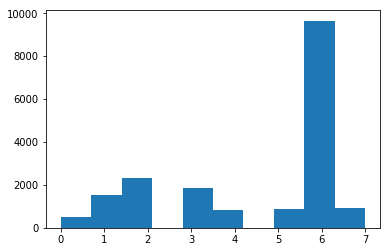

In [110]:
from sklearn.cluster import KMeans
kmean_model = KMeans()
kmean_model.fit(lsi_matrix)
labels= kmean_model.predict(lsi_matrix)
cluster_centers = kmean_model.cluster_centers_
plt.hist(labels)

In [113]:
if cluster_centers.shape[1]==3:
    reshaped_cluster_centers=cluster_centers.reshape(3,-1)
else:
    reshaped_cluster_centers=pca.transform(cluster_centers).reshape(3,-1)
    
reshaped_3_dim_lsi=pca.transform(lsi_matrix).reshape(3,-1)

In [114]:
cluster_centers_labels=list(range(len(set(labels))))
cluster_centers_labels

[0, 1, 2, 3, 4, 5, 6, 7]

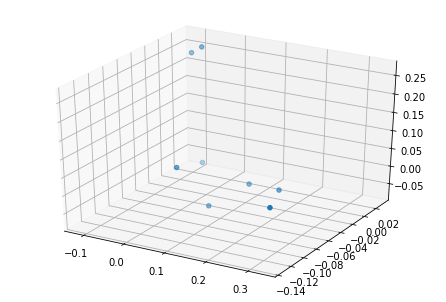

In [115]:
from mpl_toolkits.mplot3d import Axes3D
import random
NUM_TO_DRAW=100

fig = plt.figure()
ax = Axes3D(fig)


ax.scatter(reshaped_cluster_centers[0],reshaped_cluster_centers[1],reshaped_cluster_centers[2],"rD")
# ax.scatter(reshaped_3_dim_lsi[0][:NUM_TO_DRAW],reshaped_3_dim_lsi[1][:NUM_TO_DRAW],\
#            reshaped_3_dim_lsi[2][:NUM_TO_DRAW],c=labels[:NUM_TO_DRAW])


In [76]:
def get_index_of_select_lebal(target_label,reshaped_3_dim_lsi,labels):
    selected_3dim_lsi_dim0=[a for a,b in zip(reshaped_3_dim_lsi[0],labels) if b==target_label]
    selected_3dim_lsi_dim1=[a for a,b in zip(reshaped_3_dim_lsi[1],labels) if b==target_label]
    selected_3dim_lsi_dim2=[a for a,b in zip(reshaped_3_dim_lsi[2],labels) if b==target_label]
    return(selected_3dim_lsi_dim0,selected_3dim_lsi_dim1,selected_3dim_lsi_dim2)

In [77]:
l1dim0,l1dim1,l1dim2=get_index_of_select_lebal(1,reshaped_3_dim_lsi,labels)

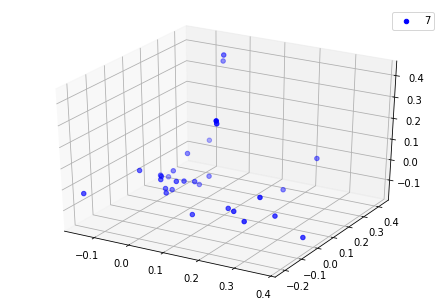

In [123]:
from itertools import cycle
target_labels=[7]
NUM_TO_DRAW=30

cycol = cycle('bgrcmk')
fig = plt.figure()

ax = Axes3D(fig)

for i in target_labels:
    l1dim0,l1dim1,l1dim2=get_index_of_select_lebal(i,reshaped_3_dim_lsi,labels)
    ax.scatter(l1dim0[:NUM_TO_DRAW],l1dim1[:NUM_TO_DRAW],l1dim2[:NUM_TO_DRAW],\
               c=next(cycol),label=i)
    
plt.legend(loc='upper right')